In [1]:
#Single View MDS Implementation
#Using the algorithm as described by: https://en.wikipedia.org/wiki/Multidimensional_scaling


from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data_set = pd.read_csv('D:/Datasets/Diabetes_Dataset.csv', header = None)
data_set.columns = ['Pregnant','Plasma_Glucose','DBP','Thickness','Insulin','BMI','Pedigree','Age','Class']
X = data_set.loc[:,data_set.columns != 'Class']
y = data_set['Class']



Text(0.5, 1.0, 'First Two Principle Components')

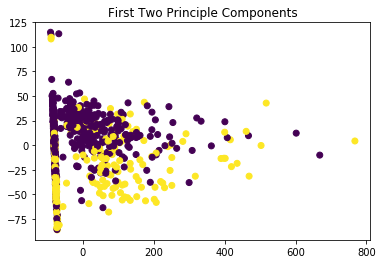

In [2]:
pca = PCA(n_components = 2)
pca.fit(X)
new = pca.transform(X)
plt.scatter(new[:,0],new[:,1], c = y)
plt.title('First Two Principle Components')

In [3]:
from numpy.linalg import svd

In [4]:
Distances = pairwise_distances(X)
Squared = np.power(Distances,2)

J = np.eye(len(Distances)) - (1/len(Distances))*np.ones(Distances.shape) #centering matrix

B = -(1/2) * np.matmul(np.matmul(J,Squared),J)   #construct B matrix from the 

L,E = np.linalg.eig(B)

In [5]:

ind = np.argsort(L)[::-1] #bit this from stack overflow

L_ordered = L[ind]  #order
E_ordered = E[:,ind]

m = 2  #number of components

#lam = np.diag(np.sqrt(E_ordered)) # makes the diag matrix


indx = np.where(L_ordered > 0)
indx = indx[0]
diag  = np.diag(np.sqrt(L_ordered[indx]))
Em  = E_ordered[:,indx]
big_X  = np.matmul(Em,diag)


C:\Users\arman\Anaconda3\lib\site-packages\numpy\core\numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 1.0, 'Euclidean Classical MDS')

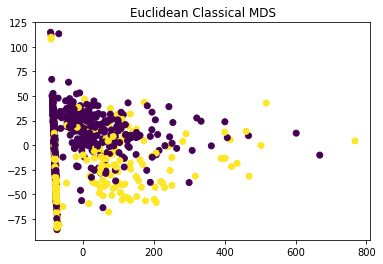

In [6]:
big_X.shape
plt.scatter(big_X[:,0],big_X[:,1], c = y)
plt.title('Euclidean Classical MDS')
